In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [2]:
from numpy.random import multinomial

def sample_series(series, n=1000):
    return multinomial(series.sum(), series/series.sum(), n)

In [3]:
import numpy as np

from lint_analysis.bin_counts.models import BinCount

def plot_pos_tag(tag, w=5, h=5):
    
    series = BinCount.pos_series(tag)
    
    expected = series.sum() / len(series)
    samples = sample_series(np.full(len(series), expected))
    
    avg_std = samples.std(1).mean()

    plt.figure(figsize=(w,h))
    
    plt.plot([0, 100], [expected, expected], c='orange', lw=0.5)

    plt.fill_between(
        range(101),
        expected + 2*avg_std,
        expected - 2*avg_std,
        color='black',
        alpha=0.1,
    )
    
    print(tag)
    plt.plot(series)
    plt.show()

#


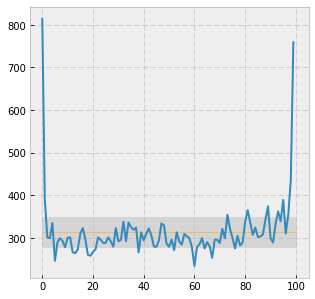

$


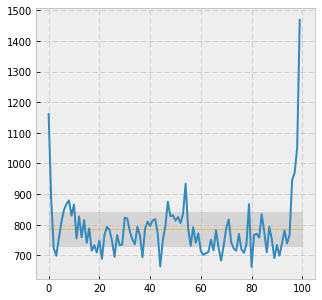

''


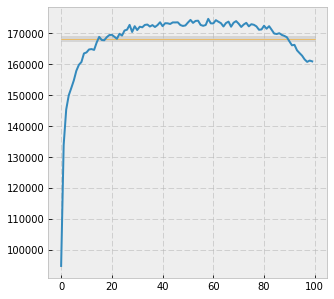

,


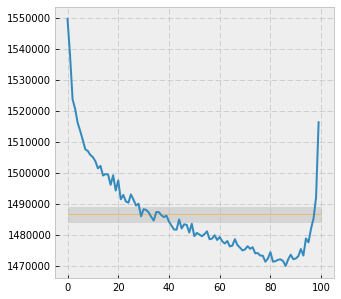

-LRB-


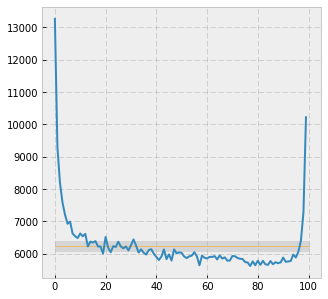

-RRB-


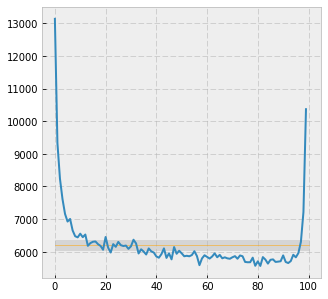

.


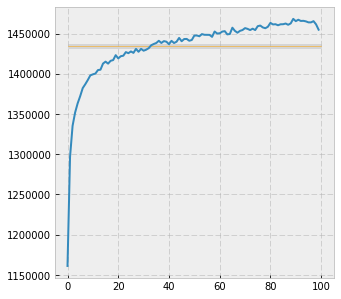

:


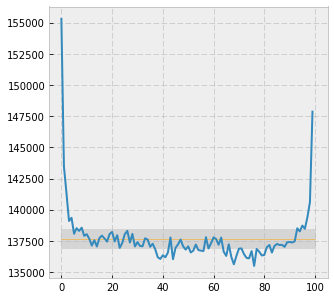

CC


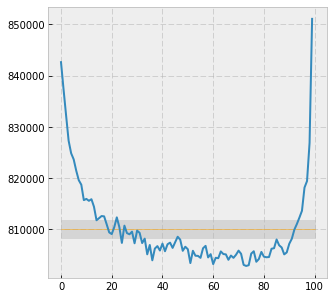

CD


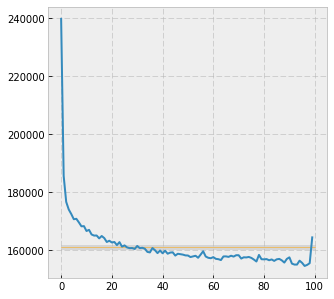

DT


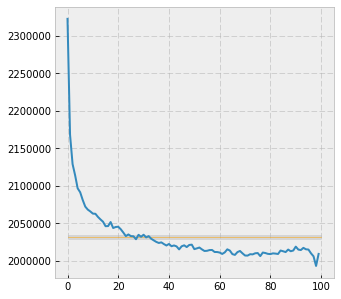

EX


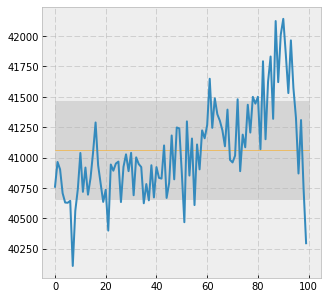

FW


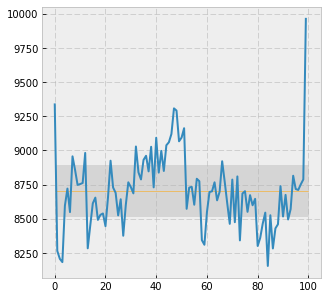

IN


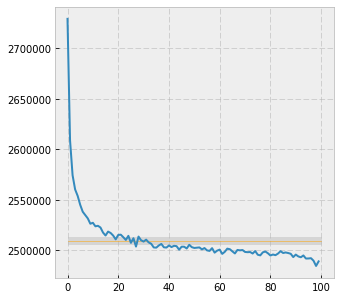

JJ


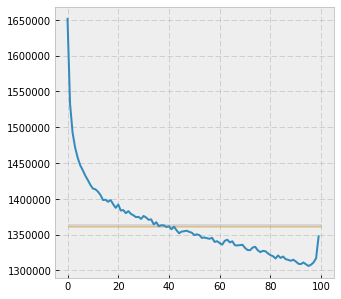

JJR


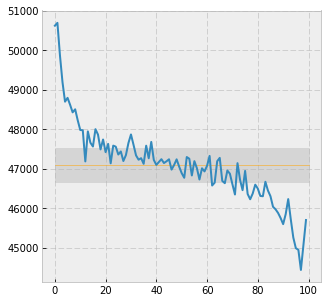

JJS


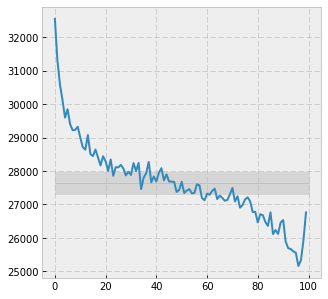

LS


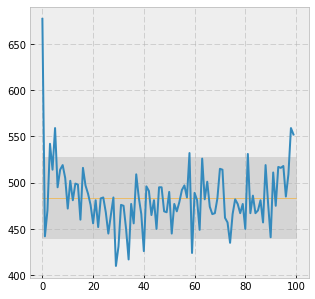

MD


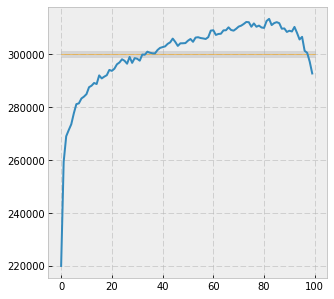

NN


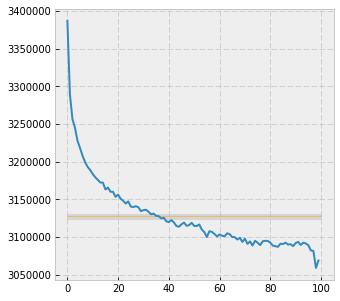

NNP


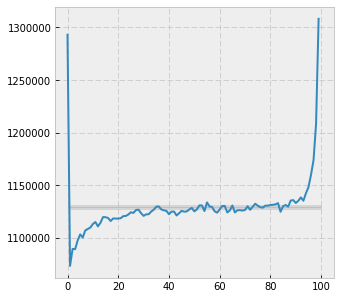

NNPS


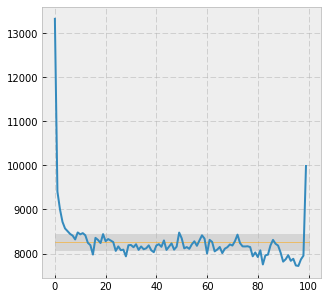

NNS


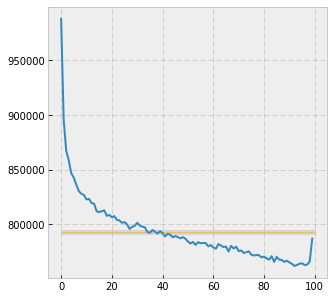

PDT


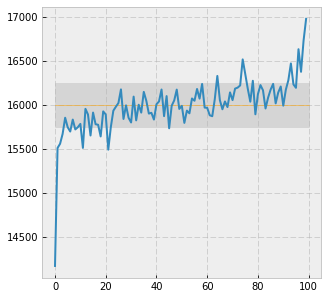

POS


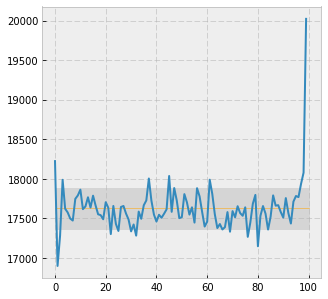

PRP


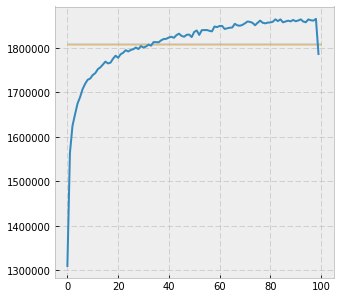

PRP$


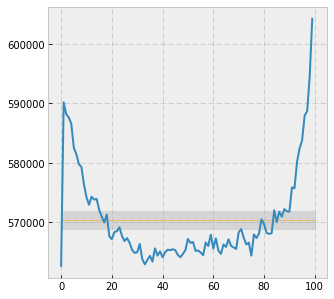

RB


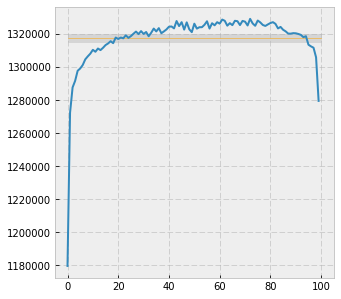

RBR


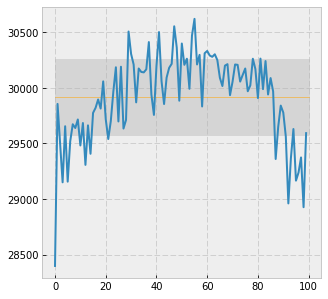

RBS


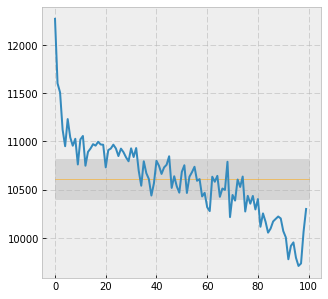

RP


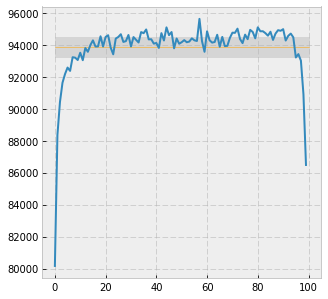

SYM


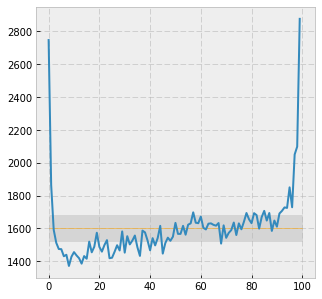

TO


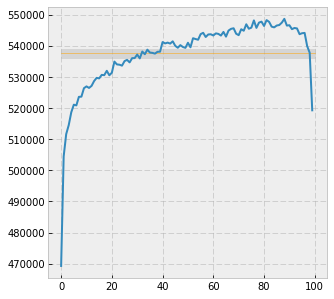

UH


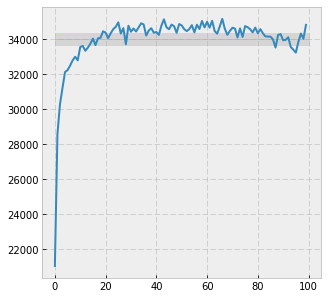

VB


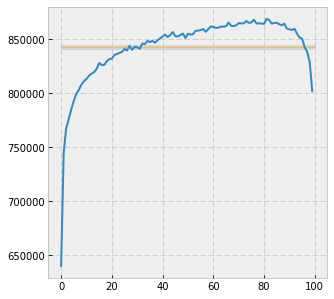

VBD


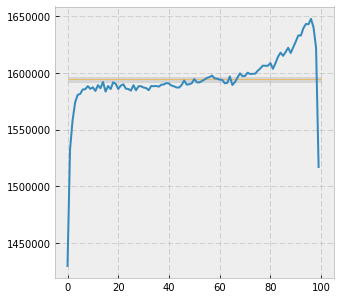

VBG


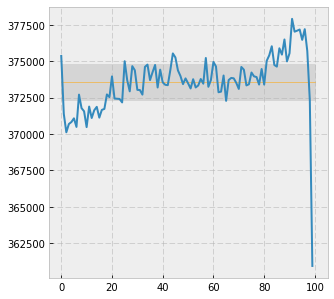

VBN


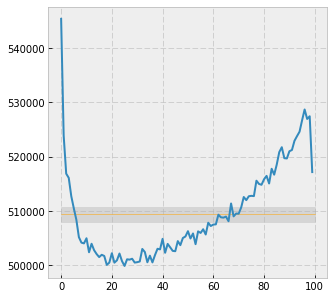

VBP


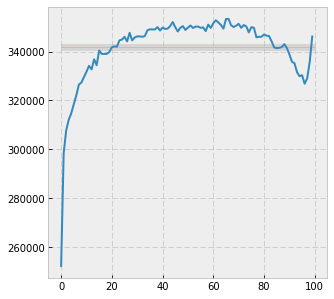

VBZ


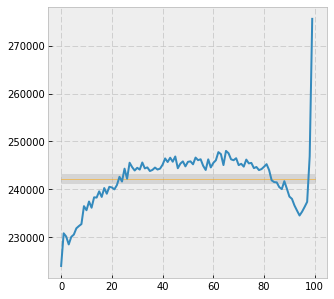

WDT


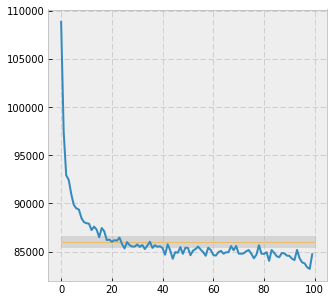

WP


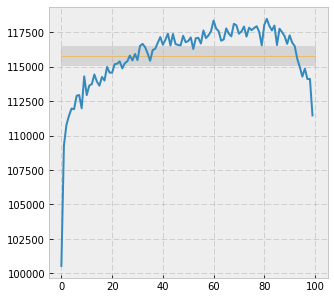

WP$


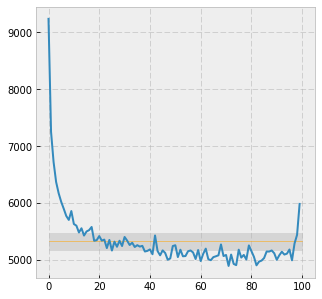

WRB


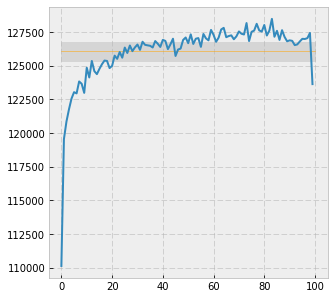

``


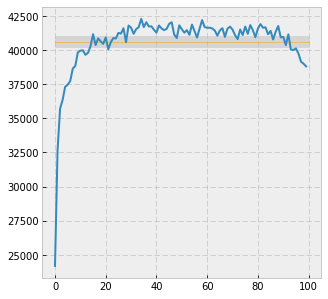

In [4]:
for pos in BinCount.pos_tags():
    plot_pos_tag(pos)